# https://chrisalbon.com/
Huge amount of notebooks with technical notes for python, data science, and deep learning 

In [6]:
print('We are importing and also printing out the versions of these main libraries:')
import sklearn
print('scikit-learn: ' + sklearn.__version__)
import numpy as np
print('numpy: '+numpy.__version__)
import pandas as pd
print('pandas: ' + pandas.__version__)
import matplotlib.pyplot as plt
print('download me matplotlib: ' + 'matplotlib.__version__')
import keras
print('keras: ' + keras.__version__)
import tensorflow
print('tensorflow: ' + tensorflow.__version__) 

We are importing and also printing out the versions of these main libraries:
scikit-learn: 0.19.1
numpy: 1.14.2
pandas: 0.23.0
download me matplotlib: matplotlib.__version__
keras: 2.1.5
tensorflow: 1.7.0


Plot test just to make sure matplotlib works bc it was causing goofy errors before in the conda env

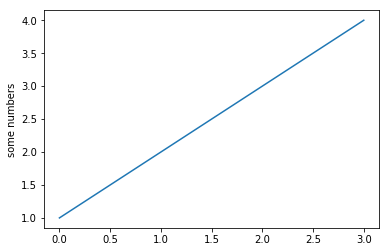

In [7]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/

The following cells show how to use a little bit of pandas as a way to import and export data frames in various ways, fill in missing data, and remove commas from large numbers

### Creating a data frame that we will be importing

In [10]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, ".", "."],
        'postTestScore': ["25,000", "94,000", 57, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


Save The data frame as a CSV in the working directory


note that the backslashes create an absolute path, if you are using / than you are getting a variable path it also need the forwardslash in front of the first folder name

In [33]:
df.to_csv('\pandas_dataframe_importing_csv\example.csv')

Load the data frame from the folder we are running the notebook in (currently a very messy virutual env within anaconda)

In [32]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv')
df

,Unnamed: 0,Unnamed: 0.1,first_name,last_name,age,preTestScore,postTestScore
0,0,0,Jason,Miller,42,4,"25,000"
1,1,1,Molly,Jacobson,52,24,"94,000"
2,2,2,Tina,.,36,31,57
3,3,3,Jake,Milner,24,.,62
4,4,4,Amy,Cooze,73,.,70


Load a CSV but with no headers

In [38]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', header=None)
df

,0,1,2,3,4,5,6,7
0,NaN,Unnamed: 0,Unnamed: 0.1,first_name,last_name,age,preTestScore,postTestScore
1,0.0,0,0,Jason,Miller,42,4,"25,000"
2,1.0,1,1,Molly,Jacobson,52,24,"94,000"
3,2.0,2,2,Tina,.,36,31,57
4,3.0,3,3,Jake,Milner,24,.,62
5,4.0,4,4,Amy,Cooze,73,.,70


Load a CSV while specifying column names 

In [54]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])
df

,,UID,First Name,Last Name,Age,Pre-Test Score,Post-Test Score
NaN,Unnamed: 0,Unnamed: 0.1,first_name,last_name,age,preTestScore,postTestScore
0.0,0,0,Jason,Miller,42,4,"25,000"
1.0,1,1,Molly,Jacobson,52,24,"94,000"
2.0,2,2,Tina,.,36,31,57
3.0,3,3,Jake,Milner,24,.,62
4.0,4,4,Amy,Cooze,73,.,70


load a csv while setting the column names to UID
Should be this:
	First Name	Last Name	Age	Pre-Test Score	Post-Test Score
UID					
NaN	first_name	last_name	age	preTestScore	postTestScore
0.0	Jason	Miller	42	4	25,000
1.0	Molly	Jacobson	52	24	94,000
2.0	Tina	.	36	31	57
3.0	Jake	Milner	24	.	62
4.0	Amy	Cooze	73	.	70

Error for KeyError :'UID'
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
index_col : int or sequence or False, default None

Column to use as the row labels of the DataFrame. If a sequence is given, a MultiIndex is used. If you have a malformed file with delimiters at the end of each line, you might consider index_col=False to force pandas to _not_ use the first column as the index (row names)

In [78]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', index_col='UID', names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])
df

KeyError: 'False'

Loading an index column while setting the first and last names
should look like this:
		UID	Age	Pre-Test Score	Post-Test Score
First Name	Last Name				
first_name	last_name	NaN	age	preTestScore	postTestScore
Jason	Miller	0.0	42	4	25,000
Molly	Jacobson	1.0	52	24	94,000
Tina	.	2.0	36	31	57
Jake	Milner	3.0	24	.	62
Amy	Cooze	4.0	73	.	70

In [57]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', index_col=['First Name', 'Last Name'], names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])
df

KeyError: 'First Name'

Load a CSV while specifying "." as a missing values

In [59]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', na_values=['.'])
pd.isnull(df) 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,first_name,last_name,age,preTestScore,postTestScore
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False


Load a csv while specifying “.” and “NA” as missing values in the Last Name column and “.” as missing values in Pre-Test Score column note the dictionary keys and the lists of lists withing it all set to a variable and then assigned to sentinels

In [61]:
sentinels = {'Last Name': ['.', 'NA'], 'Pre-Test Score': ['.']}

In [64]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', na_values=sentinels)
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,first_name,last_name,age,preTestScore,postTestScore
0,0,0,0,Jason,Miller,42,4,"25,000"
1,1,1,1,Molly,Jacobson,52,24,"94,000"
2,2,2,2,Tina,.,36,31,57
3,3,3,3,Jake,Milner,24,.,62
4,4,4,4,Amy,Cooze,73,.,70


Load a CSV while skipping the top 3 rows (aka 0,1,2)

In [66]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', na_values=sentinels, skiprows=3)
df

,2,2.1,2.2,Tina,.,36,31,57
0,3,3,3,Jake,Milner,24,.,62
1,4,4,4,Amy,Cooze,73,.,70


Load a csv while interpreting “,” in strings around numbers as thousands seperators aka removing the comma in large numbers to that they don't mess up the models

In [67]:
df = pd.read_csv('\pandas_dataframe_importing_csv\example.csv', thousands=',')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,first_name,last_name,age,preTestScore,postTestScore
0,0,0,0,Jason,Miller,42,4,25000
1,1,1,1,Molly,Jacobson,52,24,94000
2,2,2,2,Tina,.,36,31,57
3,3,3,3,Jake,Milner,24,.,62
4,4,4,4,Amy,Cooze,73,.,70
